In [28]:
import nibabel as nib
from scipy.io import loadmat

In [30]:
mdict = loadmat("mri89FOV240_recon.mat")

In [31]:
data = mdict["reconImg"]

In [32]:
print(data.shape)

(512, 512, 89)


In [6]:
img = data[200, :, :]

(1981, 224)


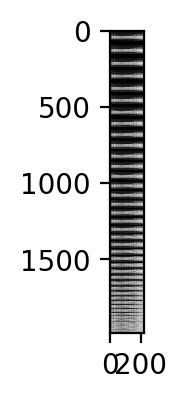

In [7]:
import matplotlib.pyplot as plt
print(img.shape)
plt.figure(figsize = (2,2), dpi=200)
plt.imshow(img, cmap='gray')

In [33]:
import numpy as np
import nibabel as nib
import glob

In [35]:
file_list = glob.glob("./data/*.nii")
file_list.sort()
for file_name in file_list:
    print(file_name)

./data/epcase01_PET_MAC_20181001110741_4.nii
./data/epcase02_PET_MAC_20180913151013_5.nii
./data/epcase03_PET_MAC_20181016124202_4.nii
./data/subj01_t1bravo.nii


In [36]:
file_nii = nib.load(file_list[-1])
file_data = file_nii.get_fdata()
file_header = file_nii.header
file_affine = file_nii.affine

In [37]:
data[data<0] = 0
data[data>1] = 1

In [27]:
import numpy as np
sino_file = nib.Nifti1Image(data, affine=file_affine, header=file_header)
nib.save(sino_file, "./recon_mri89.nii")